Exercise 1

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#for each person, 0 if homozygous for ref, 1 for heterozygous for alt, 2 for homozygous for alt
#calculate alternate allele frequency for each position

df_variants = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt",
                      sep = '\t')

df_variants


,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#subset the dataframe to only include the allele status
df_alleles = df_variants.iloc[:, 4:]
df_alleles

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#calculate the allele frequency of each chromosome position using mean   
print(df_alleles.shape[1])
alleleFreq = df_alleles.sum(axis = 1)/(2*df_alleles.shape[1])
alleleFreq  

2548


0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

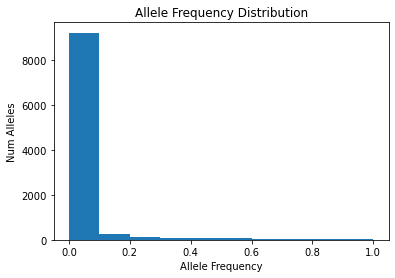

In [5]:
#plot out the mean as a histogram
fig, ax = plt.subplots()
ax.set_title("Allele Frequency Distribution")
ax.set_ylabel("Num Alleles")
ax.set_xlabel("Allele Frequency")
ax.hist(alleleFreq)
plt.show()


Exercise 2

In [6]:
#create boolean df for common allele frequencies from >0.05 and <0.95
common_alleles = alleleFreq.between(0.05, 0.95, inclusive = False)
common_alleles

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#subset the variants dataframe using boolean allele frequency series
df_common_alleles = df_variants.loc[common_alleles]
df_common_alleles

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


Exercise 3

In [8]:
#subset the common alleles dataframe to get rid of chrom position + ref sequence info
pca_input = df_common_alleles.iloc[:, 4:]
pca_input


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [9]:
#PCA will compare across all columns in a row, so need to transpose
#to get PCA across samples

pca_input = pca_input.T
pca_input


,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [10]:
#transform SNP genotype of each person for PCA
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_df=pd.DataFrame(pca_input_standardized)



In [11]:
#check the variance of the standardized PCA input
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [12]:
#get the first 10 principal components of transformed PCA dataframe
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856661, -1.54633235, ...,  0.57417652,
        -4.23475596, -3.32821196],
       [-6.13388414, -8.63182906,  2.55715828, ...,  3.89044034,
        -1.55386921,  2.69249438],
       [-6.23847319, -7.97187005, -0.74554613, ..., -2.55712811,
         1.32104286, -1.28919536],
       ...,
       [-4.09694721, -2.8273615 , -4.18045969, ..., -0.31755724,
         3.29842773,  2.57091785],
       [-6.26346243, -2.5850799 , -4.22565496, ...,  0.05677601,
         1.75875882,  2.62892879],
       [-3.17677867, -0.91694985, -6.45139541, ...,  2.75098576,
         1.02166914,  3.32205961]])

In [13]:
#Fit array of the first 10 principal components into a dataframe
pca_output_df = pd.DataFrame (data = pca_output, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546332,-5.398047,-0.526076,-0.398690,-0.705300,0.574177,-4.234756,-3.328212
1,-6.133884,-8.631829,2.557158,-3.896019,0.308289,-2.359640,1.547109,3.890440,-1.553869,2.692494
2,-6.238473,-7.971870,-0.745546,-4.015545,-0.942267,3.963699,-0.493711,-2.557128,1.321043,-1.289195
3,-5.051218,-7.008727,2.804602,-4.762253,4.386745,0.248550,-0.701283,-2.506277,1.621515,-0.741200
4,-6.634383,-8.543670,3.072067,-1.594023,-4.374718,0.772600,-2.219966,-2.618406,1.416742,-0.157074
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665793,3.301935,-0.175472,-0.572502,1.667323,-1.044784,-0.739475,1.645409
2544,-6.295888,-3.116491,-5.555821,3.336246,3.339709,3.687046,-1.352909,-3.394494,-1.509841,1.365568
2545,-4.096947,-2.827362,-4.180460,3.695607,1.561485,0.450293,1.376257,-0.317557,3.298428,2.570918
2546,-6.263462,-2.585080,-4.225655,3.890479,-3.935533,-1.948694,0.289446,0.056776,1.758759,2.628929


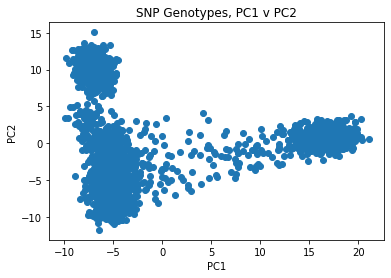

In [14]:
#plot out PC1 vs PC2 in a scatterplot
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title("SNP Genotypes, PC1 v PC2")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
plt.show()